<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [146]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# data path
dpath = "/content/drive/MyDrive/"

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# H1N1 Model.ver1

In [149]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [150]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [151]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [152]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 8ms/step - loss: 0.6205 - accuracy: 0.7769 - val_loss: 0.5172 - val_accuracy: 0.7886
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7876 - val_loss: 0.4907 - val_accuracy: 0.7964
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4797 - accuracy: 0.7945 - val_loss: 0.4786 - val_accuracy: 0.7950
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.7984 - val_loss: 0.4739 - val_accuracy: 0.8012
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.7999 - val_loss: 0.4695 - val_accuracy: 0.8010
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8002 - val_loss: 0.4717 - val_accuracy: 0.7972
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8021 - val_loss: 0.4713 - val_accuracy: 0.8010
Epoch 8/20
39/39 [==

**layer 8개**


In [153]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.5065 - accuracy: 0.7719 - val_loss: 0.4740 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4668 - accuracy: 0.7946 - val_loss: 0.4746 - val_accuracy: 0.8023
Epoch 3/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4615 - accuracy: 0.8009 - val_loss: 0.4610 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4516 - accuracy: 0.8052 - val_loss: 0.4733 - val_accuracy: 0.7894
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4504 - accuracy: 0.8064 - val_loss: 0.4543 - val_accuracy: 0.8071
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4447 - accuracy: 0.8054 - val_loss: 0.4648 - val_accuracy: 0.8033
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4407 - accuracy: 0.8090 - val_loss: 0.4519 - val_accuracy: 0.8065
Epoch 8/20
39

#### visualize

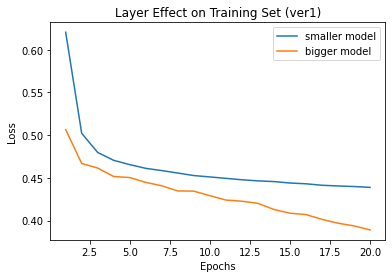

In [154]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

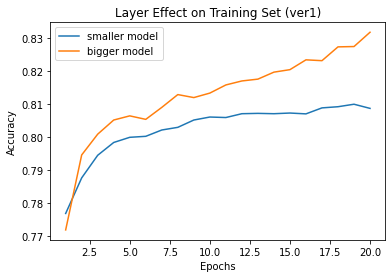

In [155]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

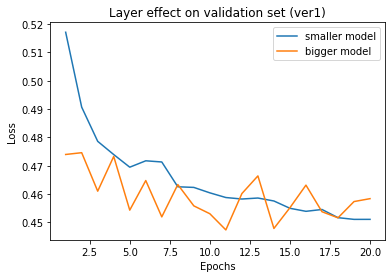

In [156]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

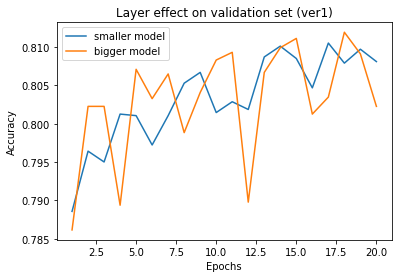

In [157]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [158]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 1.8999 - accuracy: 0.7697 - val_loss: 1.3795 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 1.0702 - accuracy: 0.7916 - val_loss: 0.7970 - val_accuracy: 0.7996
Epoch 3/20
39/39 [==============================] - 1s 18ms/step - loss: 0.6492 - accuracy: 0.8006 - val_loss: 0.5701 - val_accuracy: 0.7928
Epoch 4/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5302 - accuracy: 0.8022 - val_loss: 0.5247 - val_accuracy: 0.7928
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5016 - accuracy: 0.8029 - val_loss: 0.4989 - val_accuracy: 0.8055
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4875 - accuracy: 0.8074 - val_loss: 0.4991 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4798 - accuracy: 0.8070 - val_loss: 0.4885 - val_accuracy: 0.8077
Epoch 8/20
39

**layer 8개 + L1 regularization 2개**

In [159]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 2.0084 - accuracy: 0.7862 - val_loss: 1.4956 - val_accuracy: 0.7890
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 1.1782 - accuracy: 0.7943 - val_loss: 0.9127 - val_accuracy: 0.7972
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.7418 - accuracy: 0.7985 - val_loss: 0.6366 - val_accuracy: 0.8049
Epoch 4/20
39/39 [==============================] - 1s 19ms/step - loss: 0.5925 - accuracy: 0.8014 - val_loss: 0.5736 - val_accuracy: 0.8079
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5456 - accuracy: 0.8016 - val_loss: 0.5329 - val_accuracy: 0.8089
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5163 - accuracy: 0.8037 - val_loss: 0.5174 - val_accuracy: 0.8065
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4989 - accuracy: 0.8046 - val_loss: 0.5040 - val_accuracy: 0.8099
Epoch 8/20
39

**layer 8개 + L2 regularization 1개**

In [160]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.6273 - accuracy: 0.7853 - val_loss: 0.5575 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5333 - accuracy: 0.7927 - val_loss: 0.5307 - val_accuracy: 0.7845
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5000 - accuracy: 0.7992 - val_loss: 0.5249 - val_accuracy: 0.7825
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4824 - accuracy: 0.8010 - val_loss: 0.4835 - val_accuracy: 0.8049
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4677 - accuracy: 0.8050 - val_loss: 0.4731 - val_accuracy: 0.7996
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4618 - accuracy: 0.8049 - val_loss: 0.4717 - val_accuracy: 0.8055
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4549 - accuracy: 0.8061 - val_loss: 0.4711 - val_accuracy: 0.8075
Epoch 8/20
39

**layer 8개 + L2 regularization 2개**

In [161]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 24ms/step - loss: 0.6464 - accuracy: 0.7859 - val_loss: 0.5817 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5506 - accuracy: 0.7873 - val_loss: 0.5617 - val_accuracy: 0.7861
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5130 - accuracy: 0.7978 - val_loss: 0.5061 - val_accuracy: 0.7966
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4881 - accuracy: 0.8022 - val_loss: 0.4880 - val_accuracy: 0.8065
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4757 - accuracy: 0.8042 - val_loss: 0.4867 - val_accuracy: 0.7978
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4672 - accuracy: 0.8049 - val_loss: 0.4841 - val_accuracy: 0.8037
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4610 - accuracy: 0.8058 - val_loss: 0.4664 - val_accuracy: 0.8093
Epoch 8/20
39

**layer 8개 + L1&L2 regularization 1개**

In [162]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 37ms/step - loss: 2.1392 - accuracy: 0.7701 - val_loss: 1.5488 - val_accuracy: 0.7880
Epoch 2/20
39/39 [==============================] - 1s 27ms/step - loss: 1.2017 - accuracy: 0.7936 - val_loss: 0.9047 - val_accuracy: 0.8004
Epoch 3/20
39/39 [==============================] - 1s 26ms/step - loss: 0.7335 - accuracy: 0.7966 - val_loss: 0.6192 - val_accuracy: 0.8025
Epoch 4/20
39/39 [==============================] - 1s 27ms/step - loss: 0.5817 - accuracy: 0.7996 - val_loss: 0.5812 - val_accuracy: 0.7870
Epoch 5/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5368 - accuracy: 0.8040 - val_loss: 0.5285 - val_accuracy: 0.8043
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.5139 - accuracy: 0.8062 - val_loss: 0.5111 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.5025 - accuracy: 0.8032 - val_loss: 0.5028 - val_accuracy: 0.8035
Epoch 8/20
39

### visualize

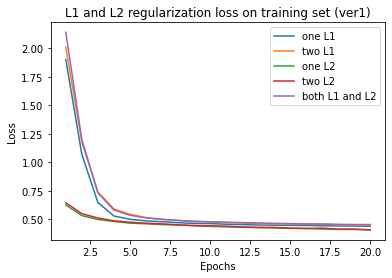

In [163]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

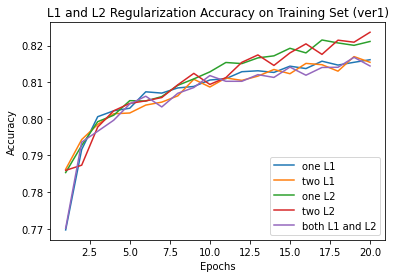

In [164]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

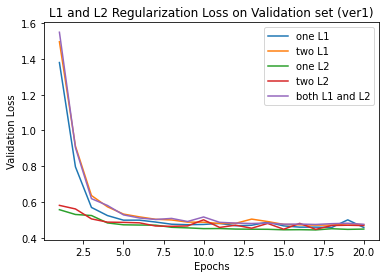

In [165]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

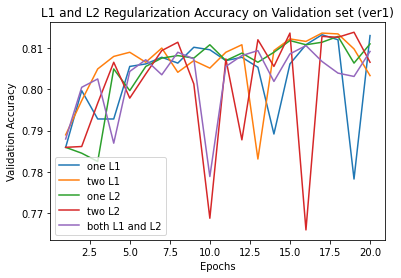

In [166]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [167]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 24ms/step - loss: 1.1513 - accuracy: 0.7552 - val_loss: 0.8554 - val_accuracy: 0.7876
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 0.7295 - accuracy: 0.7914 - val_loss: 0.6232 - val_accuracy: 0.8025
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5704 - accuracy: 0.7974 - val_loss: 0.5337 - val_accuracy: 0.8021
Epoch 4/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5136 - accuracy: 0.7996 - val_loss: 0.5150 - val_accuracy: 0.7982
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4883 - accuracy: 0.8058 - val_loss: 0.4976 - val_accuracy: 0.7948
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4754 - accuracy: 0.8032 - val_loss: 0.4871 - val_accuracy: 0.7974
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4646 - accuracy: 0.8068 - val_loss: 0.4739 - val_accuracy: 0.8049
Epoch 8/20
39

**0.002**

In [168]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 32ms/step - loss: 0.7733 - accuracy: 0.7716 - val_loss: 0.6500 - val_accuracy: 0.7876
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5978 - accuracy: 0.7943 - val_loss: 0.5577 - val_accuracy: 0.8014
Epoch 3/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5245 - accuracy: 0.7986 - val_loss: 0.5230 - val_accuracy: 0.7930
Epoch 4/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4958 - accuracy: 0.8025 - val_loss: 0.4945 - val_accuracy: 0.8000
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4766 - accuracy: 0.8041 - val_loss: 0.4942 - val_accuracy: 0.7821
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4674 - accuracy: 0.8051 - val_loss: 0.4726 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4596 - accuracy: 0.8083 - val_loss: 0.4768 - val_accuracy: 0.7948
Epoch 8/20
39

**0.001(original)**

In [169]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 22ms/step - loss: 0.6446 - accuracy: 0.7800 - val_loss: 0.5642 - val_accuracy: 0.7978
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5448 - accuracy: 0.7975 - val_loss: 0.5345 - val_accuracy: 0.8012
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5053 - accuracy: 0.8001 - val_loss: 0.5180 - val_accuracy: 0.7950
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4841 - accuracy: 0.8031 - val_loss: 0.4826 - val_accuracy: 0.8057
Epoch 5/20
39/39 [==============================] - 1s 19ms/step - loss: 0.4704 - accuracy: 0.8073 - val_loss: 0.4778 - val_accuracy: 0.8037
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4659 - accuracy: 0.8062 - val_loss: 0.4704 - val_accuracy: 0.8051
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4573 - accuracy: 0.8093 - val_loss: 0.4633 - val_accuracy: 0.8071
Epoch 8/20
39

**0.0005**

In [170]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 22ms/step - loss: 0.5842 - accuracy: 0.7844 - val_loss: 0.5307 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5176 - accuracy: 0.7929 - val_loss: 0.5136 - val_accuracy: 0.7966
Epoch 3/20
39/39 [==============================] - 1s 19ms/step - loss: 0.4956 - accuracy: 0.8007 - val_loss: 0.5055 - val_accuracy: 0.8041
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4804 - accuracy: 0.8034 - val_loss: 0.4804 - val_accuracy: 0.8075
Epoch 5/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4695 - accuracy: 0.8049 - val_loss: 0.4875 - val_accuracy: 0.8079
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4629 - accuracy: 0.8063 - val_loss: 0.4707 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4575 - accuracy: 0.8092 - val_loss: 0.4913 - val_accuracy: 0.7781
Epoch 8/20
39

**0.0001**

In [171]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 23ms/step - loss: 0.5314 - accuracy: 0.7781 - val_loss: 0.4994 - val_accuracy: 0.7900
Epoch 2/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4851 - accuracy: 0.7927 - val_loss: 0.4770 - val_accuracy: 0.8017
Epoch 3/20
39/39 [==============================] - 1s 17ms/step - loss: 0.4736 - accuracy: 0.7971 - val_loss: 0.4753 - val_accuracy: 0.8010
Epoch 4/20
39/39 [==============================] - 1s 23ms/step - loss: 0.4638 - accuracy: 0.8016 - val_loss: 0.4708 - val_accuracy: 0.8051
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.4596 - accuracy: 0.8037 - val_loss: 0.4862 - val_accuracy: 0.7831
Epoch 6/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4547 - accuracy: 0.8047 - val_loss: 0.4630 - val_accuracy: 0.8025
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.4519 - accuracy: 0.8061 - val_loss: 0.4651 - val_accuracy: 0.8025
Epoch 8/20
39

### visualize

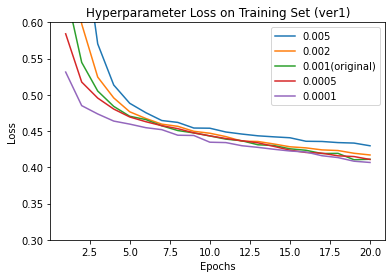

In [172]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

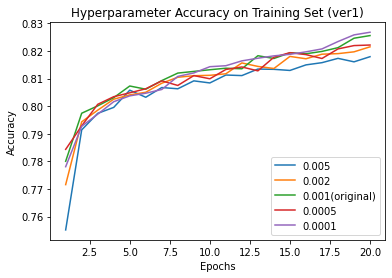

In [173]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

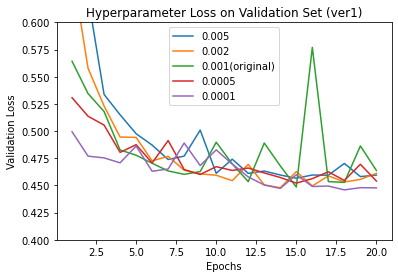

In [174]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

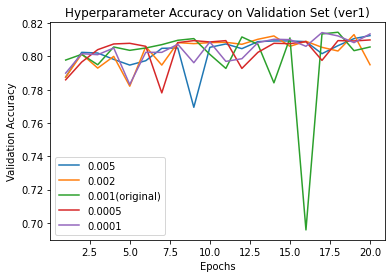

In [175]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [176]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 26ms/step - loss: 0.6533 - accuracy: 0.7818 - val_loss: 0.5729 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.5534 - accuracy: 0.7900 - val_loss: 0.5347 - val_accuracy: 0.7926
Epoch 3/20
39/39 [==============================] - 1s 33ms/step - loss: 0.5168 - accuracy: 0.7971 - val_loss: 0.5098 - val_accuracy: 0.7976
Epoch 4/20
39/39 [==============================] - 1s 35ms/step - loss: 0.4951 - accuracy: 0.8006 - val_loss: 0.5073 - val_accuracy: 0.7946
Epoch 5/20
39/39 [==============================] - 1s 39ms/step - loss: 0.4784 - accuracy: 0.8042 - val_loss: 0.4779 - val_accuracy: 0.8067
Epoch 6/20
39/39 [==============================] - 1s 28ms/step - loss: 0.4721 - accuracy: 0.8049 - val_loss: 0.4713 - val_accuracy: 0.8057
Epoch 7/20
39/39 [==============================] - 1s 29ms/step - loss: 0.4594 - accuracy: 0.8117 - val_loss: 0.4746 - val_accuracy: 0.8055
Epoch 8/20
39

**# dropout = 2**

In [177]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 26ms/step - loss: 0.6671 - accuracy: 0.7768 - val_loss: 0.5684 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.5589 - accuracy: 0.7859 - val_loss: 0.5270 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 25ms/step - loss: 0.5210 - accuracy: 0.7859 - val_loss: 0.5237 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 36ms/step - loss: 0.5027 - accuracy: 0.7859 - val_loss: 0.4938 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 1s 38ms/step - loss: 0.4868 - accuracy: 0.7874 - val_loss: 0.4830 - val_accuracy: 0.7974
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.4793 - accuracy: 0.7941 - val_loss: 0.4878 - val_accuracy: 0.7902
Epoch 7/20
39/39 [==============================] - 1s 35ms/step - loss: 0.4702 - accuracy: 0.8005 - val_loss: 0.4713 - val_accuracy: 0.8019
Epoch 8/20
39

**# dropout = 3**

In [178]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 36ms/step - loss: 0.6777 - accuracy: 0.7819 - val_loss: 0.6054 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5833 - accuracy: 0.7859 - val_loss: 0.5618 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 26ms/step - loss: 0.5425 - accuracy: 0.7859 - val_loss: 0.5252 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 25ms/step - loss: 0.5219 - accuracy: 0.7859 - val_loss: 0.5104 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5097 - accuracy: 0.7859 - val_loss: 0.4981 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4930 - accuracy: 0.7859 - val_loss: 0.4852 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4823 - accuracy: 0.7859 - val_loss: 0.4825 - val_accuracy: 0.7859
Epoch 8/20
39

### visualize

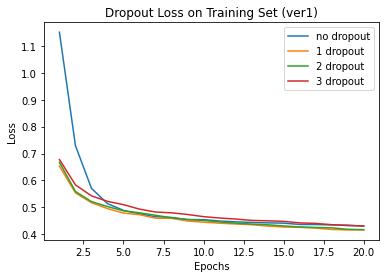

In [179]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

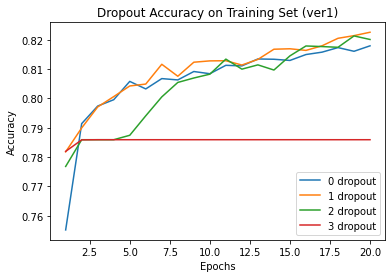

In [180]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

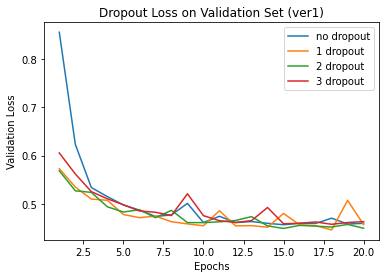

In [181]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

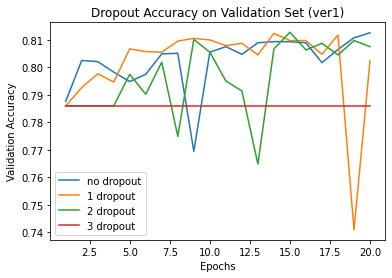

In [182]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# H1N1 Model.ver2

In [183]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [184]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [185]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [186]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [187]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_s = model_h1n1_ver2_s.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 13ms/step - loss: 0.7314 - accuracy: 0.5830 - val_loss: 0.4982 - val_accuracy: 0.7884
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.8017 - val_loss: 0.3971 - val_accuracy: 0.8228
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8664 - val_loss: 0.2937 - val_accuracy: 0.9317
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9352 - val_loss: 0.1943 - val_accuracy: 0.9519
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9779 - val_loss: 0.1168 - val_accuracy: 0.9911
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9961 - val_loss: 0.0690 - val_accuracy: 0.9988
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9995 - val_loss: 0.0396 - val_accuracy: 0.9996
Epoch 8/20
39/39 [=

**layer 8개**
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [188]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_b = model_h1n1_ver2_b.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 6s 60ms/step - loss: 0.4338 - accuracy: 0.8223 - val_loss: 0.2326 - val_accuracy: 0.9599
Epoch 2/20
39/39 [==============================] - 1s 35ms/step - loss: 0.1345 - accuracy: 0.9531 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 35ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3059e-04 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 35ms/step - loss: 4.5009e-05 - accuracy: 1.0000 - val_loss: 9.5955e-06 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 32ms/step - loss: 3.6084e-06 - accuracy: 1.0000 - val_loss: 8.0161e-07 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 21ms/step - loss: 3.7222e-07 - accuracy: 1.0000 - val_loss: 1.0665e-07 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 5.5382e-08 - accuracy: 1.0000 - val_loss: 1.8618e-08 

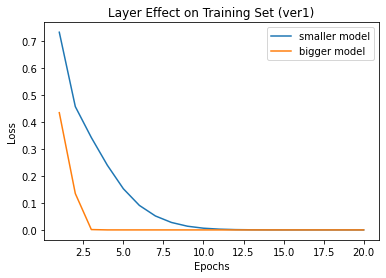

In [189]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_s = history_h1n1_ver2_s.history
history_dict_h1n1_ver2_b = history_h1n1_ver2_b.history

loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["loss"]
loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

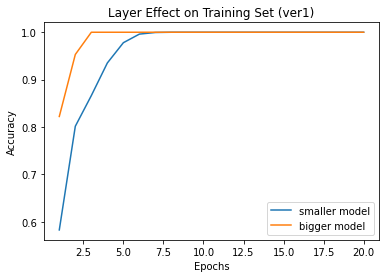

In [190]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["accuracy"]
acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

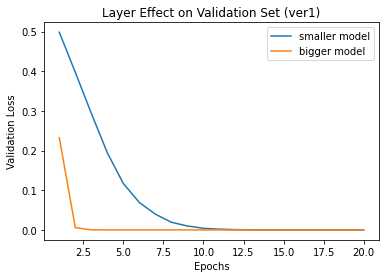

In [191]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_loss"]
val_loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

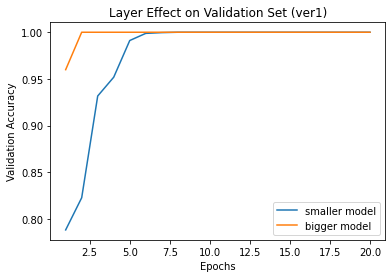

In [192]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_accuracy"]
val_acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [193]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 32ms/step - loss: 1.8687 - accuracy: 0.7775 - val_loss: 1.2296 - val_accuracy: 0.9229
Epoch 2/20
39/39 [==============================] - 1s 25ms/step - loss: 0.8358 - accuracy: 0.9586 - val_loss: 0.4860 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.3253 - accuracy: 0.9998 - val_loss: 0.1998 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 25ms/step - loss: 0.3466 - accuracy: 0.9628 - val_loss: 0.1545 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 32ms/step - loss: 0.1390 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 32ms/step - loss: 0.2708 - accuracy: 0.9702 - val_loss: 0.1000 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0877 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L1 regularization 2개**

In [194]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 30ms/step - loss: 1.9344 - accuracy: 0.8227 - val_loss: 1.2099 - val_accuracy: 0.9770
Epoch 2/20
39/39 [==============================] - 1s 27ms/step - loss: 0.9037 - accuracy: 0.9831 - val_loss: 0.5955 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4243 - accuracy: 1.0000 - val_loss: 0.2760 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 27ms/step - loss: 0.3160 - accuracy: 0.9864 - val_loss: 0.2024 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 38ms/step - loss: 0.1741 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1890 - accuracy: 0.9947 - val_loss: 0.1103 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.3312 - accuracy: 0.9648 - val_loss: 0.1043 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L2 regularization 1개**

In [195]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 35ms/step - loss: 0.4964 - accuracy: 0.8238 - val_loss: 0.2295 - val_accuracy: 0.9406
Epoch 2/20
39/39 [==============================] - 1s 38ms/step - loss: 0.2225 - accuracy: 0.9582 - val_loss: 0.0639 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0496 - accuracy: 0.9999 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 27ms/step - loss: 0.2073 - accuracy: 0.9745 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L2 regularization 2개**

In [196]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 35ms/step - loss: 0.5293 - accuracy: 0.8352 - val_loss: 0.2734 - val_accuracy: 0.9251
Epoch 2/20
39/39 [==============================] - 1s 29ms/step - loss: 0.1433 - accuracy: 0.9889 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.2523 - accuracy: 0.9700 - val_loss: 0.0501 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 26ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 24ms/step - loss: 0.1136 - accuracy: 0.9948 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L1&L2 regularization 1개**

In [197]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 5s 54ms/step - loss: 2.0592 - accuracy: 0.8222 - val_loss: 1.3034 - val_accuracy: 0.9706
Epoch 2/20
39/39 [==============================] - 1s 34ms/step - loss: 0.9427 - accuracy: 0.9896 - val_loss: 0.6094 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 26ms/step - loss: 0.4795 - accuracy: 0.9940 - val_loss: 0.2982 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 20ms/step - loss: 0.2393 - accuracy: 1.0000 - val_loss: 1.8006 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 1s 26ms/step - loss: 0.4423 - accuracy: 0.9684 - val_loss: 0.1514 - val_accuracy: 0.9998
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1280 - accuracy: 1.0000 - val_loss: 0.1108 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 28ms/step - loss: 0.1610 - accuracy: 0.9869 - val_loss: 0.6565 - val_accuracy: 0.7894
Epoch 8/20
39

### visualize

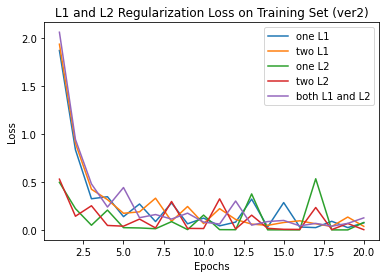

In [198]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

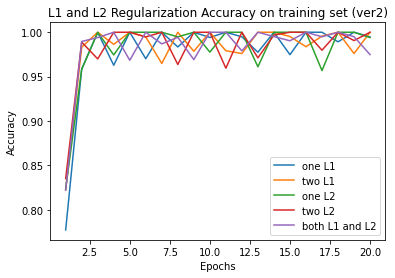

In [199]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

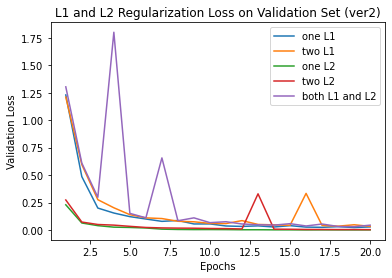

In [200]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

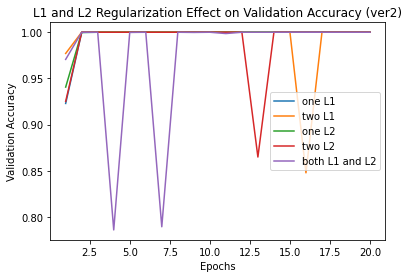

In [201]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [202]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 34ms/step - loss: 1.0143 - accuracy: 0.8393 - val_loss: 0.5955 - val_accuracy: 0.9599
Epoch 2/20
39/39 [==============================] - 1s 25ms/step - loss: 0.4330 - accuracy: 0.9846 - val_loss: 0.2536 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 22ms/step - loss: 0.2891 - accuracy: 0.9879 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 22ms/step - loss: 0.1268 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 26ms/step - loss: 0.2671 - accuracy: 0.9683 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 0.2058 - accuracy: 0.9760 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 8/20
39

**0.002**

In [203]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 36ms/step - loss: 0.6519 - accuracy: 0.8426 - val_loss: 0.3121 - val_accuracy: 0.9863
Epoch 2/20
39/39 [==============================] - 1s 31ms/step - loss: 0.2467 - accuracy: 0.9742 - val_loss: 0.1270 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 29ms/step - loss: 0.2372 - accuracy: 0.9744 - val_loss: 0.0928 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0840 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 31ms/step - loss: 0.1723 - accuracy: 0.9892 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.7548 - val_accuracy: 0.7998
Epoch 8/20
39

**0.001(original)**

In [204]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver2,
                                                     y_train_h1n1_ver2,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 35ms/step - loss: 0.5529 - accuracy: 0.8248 - val_loss: 0.2557 - val_accuracy: 0.9732
Epoch 2/20
39/39 [==============================] - 1s 29ms/step - loss: 0.1905 - accuracy: 0.9721 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 0.2414 - accuracy: 0.9743 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.1062 - accuracy: 0.9948 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 8/20
39

**0.0005**

In [205]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 35ms/step - loss: 0.4557 - accuracy: 0.8373 - val_loss: 0.1817 - val_accuracy: 0.9968
Epoch 2/20
39/39 [==============================] - 1s 23ms/step - loss: 0.1175 - accuracy: 0.9780 - val_loss: 0.0438 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 29ms/step - loss: 0.0896 - accuracy: 0.9949 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 29ms/step - loss: 0.3063 - accuracy: 0.9722 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 8/20
39

**0.0001**

In [206]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 38ms/step - loss: 0.4479 - accuracy: 0.8235 - val_loss: 0.1435 - val_accuracy: 0.9587
Epoch 2/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0708 - accuracy: 0.9831 - val_loss: 0.0111 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.2840 - accuracy: 0.9550 - val_loss: 0.0100 - val_accuracy: 0.9998
Epoch 4/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 23ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 25ms/step - loss: 0.1031 - accuracy: 0.9943 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 8/20
39

### visualize

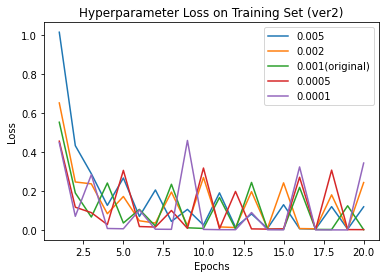

In [207]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

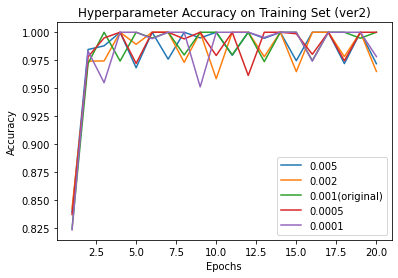

In [208]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

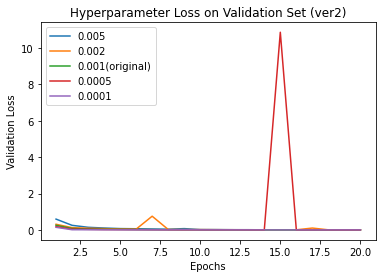

In [209]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

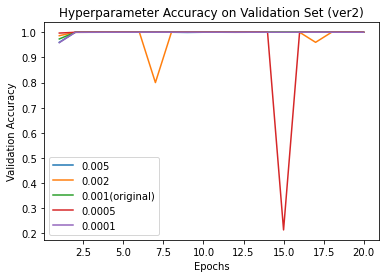

In [210]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [211]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 24ms/step - loss: 0.5412 - accuracy: 0.8247 - val_loss: 0.3036 - val_accuracy: 0.9011
Epoch 2/20
39/39 [==============================] - 1s 19ms/step - loss: 0.1541 - accuracy: 0.9888 - val_loss: 0.0798 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 18ms/step - loss: 0.2084 - accuracy: 0.9808 - val_loss: 0.6869 - val_accuracy: 0.8431
Epoch 4/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0681 - accuracy: 0.9955 - val_loss: 0.0498 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0477 - accuracy: 0.9999 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 18ms/step - loss: 0.1680 - accuracy: 0.9842 - val_loss: 0.7783 - val_accuracy: 0.8349
Epoch 7/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0444 - accuracy: 0.9959 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 8/20
39

**# dropout = 2**

In [212]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 5s 28ms/step - loss: 0.5670 - accuracy: 0.8074 - val_loss: 0.2366 - val_accuracy: 0.9760
Epoch 2/20
39/39 [==============================] - 1s 21ms/step - loss: 0.2739 - accuracy: 0.9525 - val_loss: 0.0950 - val_accuracy: 0.9994
Epoch 3/20
39/39 [==============================] - 1s 21ms/step - loss: 0.0872 - accuracy: 0.9996 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 0.1501 - accuracy: 0.9932 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 21ms/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 21ms/step - loss: 0.2822 - accuracy: 0.9800 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 8/20
39

**# dropout = 3**

In [213]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_threedr = model_h1n1_ver2_threedr.fit(x_train_h1n1_ver2,
                                                        y_train_h1n1_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 38ms/step - loss: 0.5567 - accuracy: 0.7859 - val_loss: 0.3684 - val_accuracy: 0.9833
Epoch 2/20
39/39 [==============================] - 1s 29ms/step - loss: 0.2571 - accuracy: 0.9166 - val_loss: 0.1236 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1978 - accuracy: 0.9573 - val_loss: 0.0648 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 29ms/step - loss: 0.0900 - accuracy: 0.9916 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 28ms/step - loss: 0.2142 - accuracy: 0.9744 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0645 - accuracy: 0.9978 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 30ms/step - loss: 0.2080 - accuracy: 0.9916 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 8/20
39

### visualize

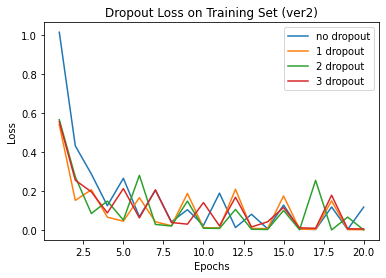

In [214]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_threedr = history_h1n1_ver2_threedr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

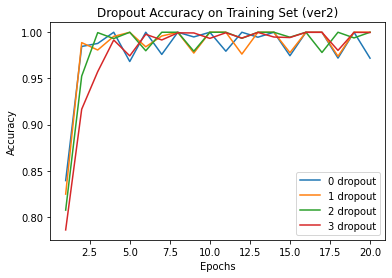

In [215]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

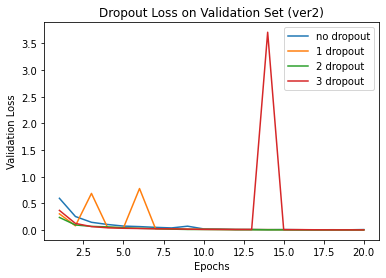

In [216]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

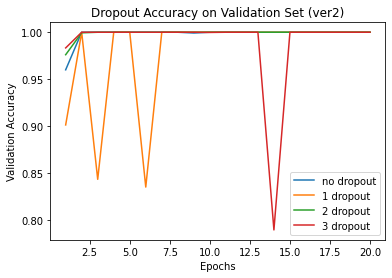

In [217]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Seasonal Model.ver1

In [218]:
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [219]:
print(train_seasonal_ver1.shape)
train_seasonal_ver1.head()

(25026, 22)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


In [220]:
train_seasonal_ver1.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')

In [221]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver1.iloc[:,1:-1]
target = train_seasonal_ver1['seasonal_vaccine']

x_train_seasonal_ver1, x_valid_seasonal_ver1, y_train_seasonal_ver1, y_valid_seasonal_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [222]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_s = model_seasonal_ver1_s.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 13ms/step - loss: 0.6686 - accuracy: 0.6077 - val_loss: 0.6424 - val_accuracy: 0.6642
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.6789 - val_loss: 0.6067 - val_accuracy: 0.6820
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5873 - accuracy: 0.7057 - val_loss: 0.5847 - val_accuracy: 0.6948
Epoch 4/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.7195 - val_loss: 0.5703 - val_accuracy: 0.7085
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5536 - accuracy: 0.7278 - val_loss: 0.5716 - val_accuracy: 0.7066
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5480 - accuracy: 0.7312 - val_loss: 0.5586 - val_accuracy: 0.7277
Epoch 7/20
40/40 [==============================] - 0s 7ms/step - loss: 0.5440 - accuracy: 0.7327 - val_loss: 0.5643 - val_accuracy: 0.7201
Epoch 8/20
40/40 [=

**layer 8개**


In [223]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_b = model_seasonal_ver1_b.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 35ms/step - loss: 0.6123 - accuracy: 0.6689 - val_loss: 0.6137 - val_accuracy: 0.6612
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 0.5564 - accuracy: 0.7214 - val_loss: 0.5787 - val_accuracy: 0.6948
Epoch 3/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5474 - accuracy: 0.7303 - val_loss: 0.5562 - val_accuracy: 0.7291
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.5424 - accuracy: 0.7330 - val_loss: 0.5565 - val_accuracy: 0.7289
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.5388 - accuracy: 0.7350 - val_loss: 0.5509 - val_accuracy: 0.7297
Epoch 6/20
40/40 [==============================] - 1s 30ms/step - loss: 0.5354 - accuracy: 0.7364 - val_loss: 0.5717 - val_accuracy: 0.7237
Epoch 7/20
40/40 [==============================] - 1s 28ms/step - loss: 0.5289 - accuracy: 0.7409 - val_loss: 0.5485 - val_accuracy: 0.7289
Epoch 8/20
40

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [224]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_1 = model_seasonal_ver1_L1_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 2.0016 - accuracy: 0.6729 - val_loss: 1.6609 - val_accuracy: 0.6107
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 1.2158 - accuracy: 0.7146 - val_loss: 0.9518 - val_accuracy: 0.7233
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.7898 - accuracy: 0.7276 - val_loss: 0.6940 - val_accuracy: 0.7267
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6515 - accuracy: 0.7296 - val_loss: 0.6467 - val_accuracy: 0.7149
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6087 - accuracy: 0.7326 - val_loss: 0.6107 - val_accuracy: 0.7253
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5862 - accuracy: 0.7384 - val_loss: 0.5977 - val_accuracy: 0.7335
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5749 - accuracy: 0.7409 - val_loss: 0.6058 - val_accuracy: 0.7243
Epoch 8/20
40

**layer 8개 + L1 regularization 2개**

In [225]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_2 = model_seasonal_ver1_L1_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 2.1154 - accuracy: 0.6662 - val_loss: 1.7400 - val_accuracy: 0.5641
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 1.2906 - accuracy: 0.7145 - val_loss: 1.0230 - val_accuracy: 0.7105
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.8559 - accuracy: 0.7282 - val_loss: 0.7740 - val_accuracy: 0.7111
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.7098 - accuracy: 0.7259 - val_loss: 0.7231 - val_accuracy: 0.7143
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6528 - accuracy: 0.7330 - val_loss: 0.6625 - val_accuracy: 0.7273
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.6201 - accuracy: 0.7357 - val_loss: 0.6338 - val_accuracy: 0.7215
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6026 - accuracy: 0.7373 - val_loss: 0.6285 - val_accuracy: 0.7277
Epoch 8/20
40

**layer 8개 + L2 regularization 1개**

In [226]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_1 = model_seasonal_ver1_L2_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.7366 - accuracy: 0.6520 - val_loss: 0.6645 - val_accuracy: 0.7048
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6264 - accuracy: 0.7167 - val_loss: 0.6381 - val_accuracy: 0.6800
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5884 - accuracy: 0.7239 - val_loss: 0.6220 - val_accuracy: 0.7046
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5734 - accuracy: 0.7295 - val_loss: 0.5728 - val_accuracy: 0.7287
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5589 - accuracy: 0.7330 - val_loss: 0.5835 - val_accuracy: 0.7269
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5509 - accuracy: 0.7345 - val_loss: 0.5706 - val_accuracy: 0.7299
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5462 - accuracy: 0.7381 - val_loss: 0.5708 - val_accuracy: 0.7235
Epoch 8/20
40

**layer 8개 + L2 regularization 2개**

In [227]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_2 = model_seasonal_ver1_L2_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 24ms/step - loss: 0.7440 - accuracy: 0.6666 - val_loss: 0.7305 - val_accuracy: 0.6608
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6379 - accuracy: 0.7192 - val_loss: 0.6227 - val_accuracy: 0.7181
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5987 - accuracy: 0.7280 - val_loss: 0.5904 - val_accuracy: 0.7283
Epoch 4/20
40/40 [==============================] - 1s 19ms/step - loss: 0.5782 - accuracy: 0.7327 - val_loss: 0.5822 - val_accuracy: 0.7307
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5645 - accuracy: 0.7358 - val_loss: 0.6281 - val_accuracy: 0.6998
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5583 - accuracy: 0.7384 - val_loss: 0.5827 - val_accuracy: 0.7239
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5463 - accuracy: 0.7425 - val_loss: 0.5594 - val_accuracy: 0.7365
Epoch 8/20
40

**layer 8개 + L1&L2 regularization 1개**

In [228]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L12 = model_seasonal_ver1_L12.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 24ms/step - loss: 2.2087 - accuracy: 0.6417 - val_loss: 1.6099 - val_accuracy: 0.7151
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 1.2820 - accuracy: 0.7141 - val_loss: 0.9956 - val_accuracy: 0.7042
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.8301 - accuracy: 0.7248 - val_loss: 0.7346 - val_accuracy: 0.7313
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6902 - accuracy: 0.7282 - val_loss: 0.6948 - val_accuracy: 0.6874
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6387 - accuracy: 0.7339 - val_loss: 0.6305 - val_accuracy: 0.7273
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6118 - accuracy: 0.7359 - val_loss: 0.6570 - val_accuracy: 0.7113
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5959 - accuracy: 0.7354 - val_loss: 0.6382 - val_accuracy: 0.6926
Epoch 8/20
40

### visualize

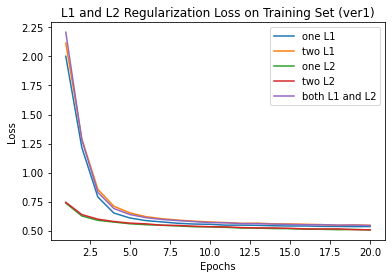

In [229]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history

loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["loss"]
loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["loss"]
loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["loss"]
loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["loss"]
loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

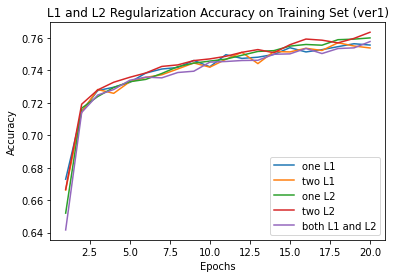

In [230]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["accuracy"]
acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["accuracy"]
acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["accuracy"]
acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["accuracy"]
acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

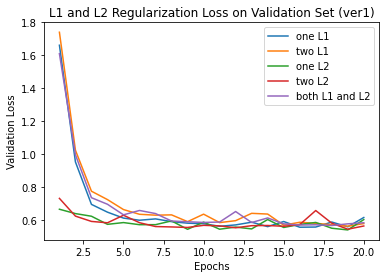

In [231]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_loss"]
val_loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_loss"]
val_loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_loss"]
val_loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_loss"]
val_loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

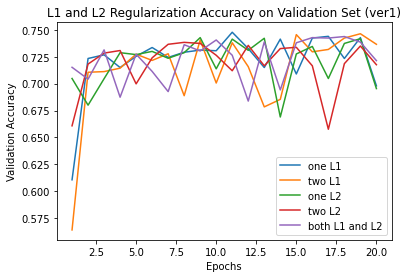

In [232]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_accuracy"]
val_acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_accuracy"]
val_acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_accuracy"]
val_acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_accuracy"]
val_acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [233]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_one = model_seasonal_ver1_one.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 1.2219 - accuracy: 0.6587 - val_loss: 0.9654 - val_accuracy: 0.6908
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 0.8279 - accuracy: 0.7176 - val_loss: 0.7313 - val_accuracy: 0.7243
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6715 - accuracy: 0.7295 - val_loss: 0.6687 - val_accuracy: 0.7058
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6122 - accuracy: 0.7313 - val_loss: 0.6184 - val_accuracy: 0.7006
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5847 - accuracy: 0.7362 - val_loss: 0.6012 - val_accuracy: 0.7179
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5676 - accuracy: 0.7372 - val_loss: 0.5761 - val_accuracy: 0.7361
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5549 - accuracy: 0.7421 - val_loss: 0.5704 - val_accuracy: 0.7343
Epoch 8/20
40

**0.002**

In [234]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_two = model_seasonal_ver1_two.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.9006 - accuracy: 0.6318 - val_loss: 0.8296 - val_accuracy: 0.6396
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6876 - accuracy: 0.7205 - val_loss: 0.6574 - val_accuracy: 0.7213
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6198 - accuracy: 0.7227 - val_loss: 0.6141 - val_accuracy: 0.7243
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5854 - accuracy: 0.7309 - val_loss: 0.5930 - val_accuracy: 0.7161
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5690 - accuracy: 0.7344 - val_loss: 0.6018 - val_accuracy: 0.7087
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5585 - accuracy: 0.7368 - val_loss: 0.5925 - val_accuracy: 0.7275
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5522 - accuracy: 0.7373 - val_loss: 0.5607 - val_accuracy: 0.7315
Epoch 8/20
40

**0.001(original)**

In [235]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_three = model_seasonal_ver1_three.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 24ms/step - loss: 0.7631 - accuracy: 0.6464 - val_loss: 0.6783 - val_accuracy: 0.7149
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6381 - accuracy: 0.7245 - val_loss: 0.6945 - val_accuracy: 0.6400
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6015 - accuracy: 0.7283 - val_loss: 0.5991 - val_accuracy: 0.7199
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5805 - accuracy: 0.7293 - val_loss: 0.6122 - val_accuracy: 0.6940
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5651 - accuracy: 0.7352 - val_loss: 0.6528 - val_accuracy: 0.6862
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5579 - accuracy: 0.7392 - val_loss: 0.5939 - val_accuracy: 0.6958
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5495 - accuracy: 0.7425 - val_loss: 0.5819 - val_accuracy: 0.7323
Epoch 8/20
40

**0.0005**

In [236]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_four = model_seasonal_ver1_four.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.6826 - accuracy: 0.6656 - val_loss: 0.6435 - val_accuracy: 0.6964
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6096 - accuracy: 0.7147 - val_loss: 0.6019 - val_accuracy: 0.7227
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5857 - accuracy: 0.7262 - val_loss: 0.5863 - val_accuracy: 0.7161
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5696 - accuracy: 0.7303 - val_loss: 0.5815 - val_accuracy: 0.7287
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5603 - accuracy: 0.7317 - val_loss: 0.5861 - val_accuracy: 0.7229
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5543 - accuracy: 0.7353 - val_loss: 0.5605 - val_accuracy: 0.7345
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.5464 - accuracy: 0.7402 - val_loss: 0.5752 - val_accuracy: 0.7123
Epoch 8/20
40

**0.0001**

In [237]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_five = model_seasonal_ver1_five.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.6297 - accuracy: 0.6664 - val_loss: 0.5939 - val_accuracy: 0.7064
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5691 - accuracy: 0.7230 - val_loss: 0.5693 - val_accuracy: 0.7279
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5596 - accuracy: 0.7273 - val_loss: 0.5760 - val_accuracy: 0.7257
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5504 - accuracy: 0.7344 - val_loss: 0.5585 - val_accuracy: 0.7311
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5458 - accuracy: 0.7367 - val_loss: 0.5546 - val_accuracy: 0.7341
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5401 - accuracy: 0.7379 - val_loss: 0.5628 - val_accuracy: 0.7283
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5367 - accuracy: 0.7403 - val_loss: 0.5530 - val_accuracy: 0.7277
Epoch 8/20
40

### visualize

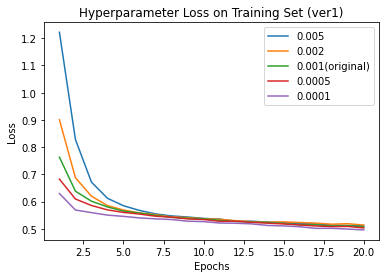

In [238]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_one = history_seasonal_ver1_one.history
history_dict_seasonal_ver1_two = history_seasonal_ver1_two.history
history_dict_seasonal_ver1_three = history_seasonal_ver1_three.history
history_dict_seasonal_ver1_four = history_seasonal_ver1_four.history
history_dict_seasonal_ver1_five = history_seasonal_ver1_five.history

loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["loss"]
loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["loss"]
loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["loss"]
loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["loss"]
loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

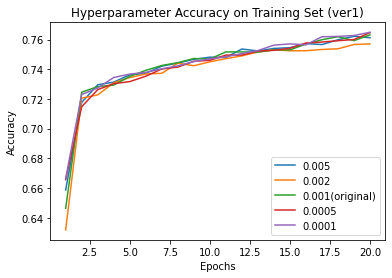

In [239]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["accuracy"]
acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["accuracy"]
acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["accuracy"]
acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["accuracy"]
acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

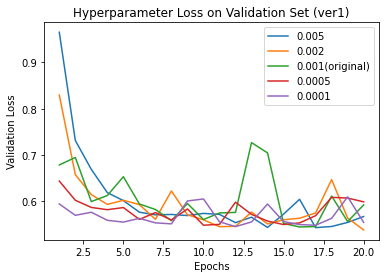

In [240]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_loss"]
val_loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_loss"]
val_loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_loss"]
val_loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_loss"]
val_loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

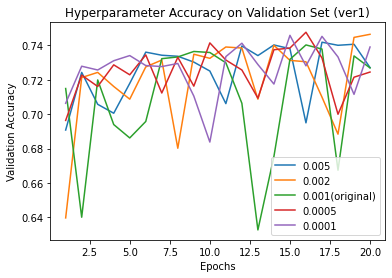

In [241]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_accuracy"]
val_acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_accuracy"]
val_acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_accuracy"]
val_acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_accuracy"]
val_acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [242]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_onedr = model_seasonal_ver1_onedr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.7811 - accuracy: 0.6350 - val_loss: 0.6671 - val_accuracy: 0.7101
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6437 - accuracy: 0.7178 - val_loss: 0.6568 - val_accuracy: 0.6648
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6051 - accuracy: 0.7274 - val_loss: 0.5943 - val_accuracy: 0.7199
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5851 - accuracy: 0.7307 - val_loss: 0.6176 - val_accuracy: 0.7243
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5724 - accuracy: 0.7305 - val_loss: 0.5925 - val_accuracy: 0.7131
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5601 - accuracy: 0.7376 - val_loss: 0.6632 - val_accuracy: 0.6684
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5563 - accuracy: 0.7361 - val_loss: 0.5629 - val_accuracy: 0.7211
Epoch 8/20
40

**# dropout = 2**

In [243]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_twodr = model_seasonal_ver1_twodr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.7594 - accuracy: 0.6616 - val_loss: 0.7043 - val_accuracy: 0.6692
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6558 - accuracy: 0.7193 - val_loss: 0.6343 - val_accuracy: 0.7189
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6170 - accuracy: 0.7260 - val_loss: 0.6195 - val_accuracy: 0.7227
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5976 - accuracy: 0.7306 - val_loss: 0.5892 - val_accuracy: 0.7333
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5788 - accuracy: 0.7359 - val_loss: 0.5848 - val_accuracy: 0.7165
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.5716 - accuracy: 0.7341 - val_loss: 0.5776 - val_accuracy: 0.7155
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5594 - accuracy: 0.7416 - val_loss: 0.5753 - val_accuracy: 0.7223
Epoch 8/20
40

**# dropout = 3**

In [244]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_threedr = model_seasonal_ver1_threedr.fit(x_train_seasonal_ver1,
                                                                y_train_seasonal_ver1,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 26ms/step - loss: 0.8034 - accuracy: 0.5917 - val_loss: 0.7252 - val_accuracy: 0.6418
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6925 - accuracy: 0.6767 - val_loss: 0.6602 - val_accuracy: 0.6928
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6455 - accuracy: 0.7054 - val_loss: 0.6352 - val_accuracy: 0.6620
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6165 - accuracy: 0.7135 - val_loss: 0.6352 - val_accuracy: 0.7066
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6038 - accuracy: 0.7189 - val_loss: 0.6107 - val_accuracy: 0.7239
Epoch 6/20
40/40 [==============================] - 1s 20ms/step - loss: 0.5848 - accuracy: 0.7294 - val_loss: 0.5991 - val_accuracy: 0.7233
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.5759 - accuracy: 0.7344 - val_loss: 0.5798 - val_accuracy: 0.7319
Epoch 8/20
40

### visualize

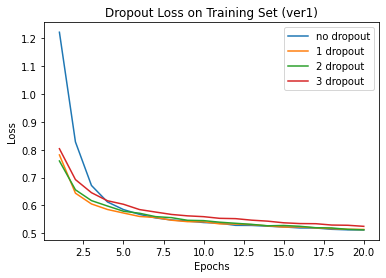

In [245]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["loss"]
loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["loss"]
loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

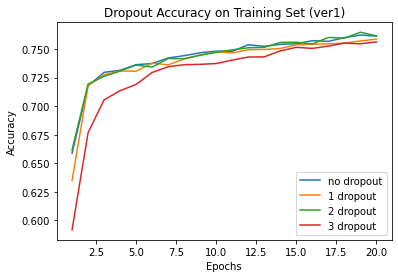

In [246]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["accuracy"]
acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["accuracy"]
acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

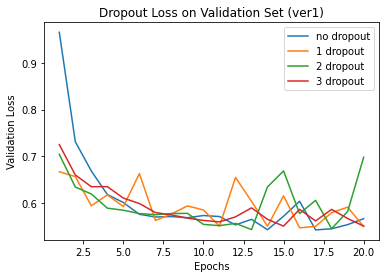

In [247]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_loss"]
val_loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_loss"]
val_loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

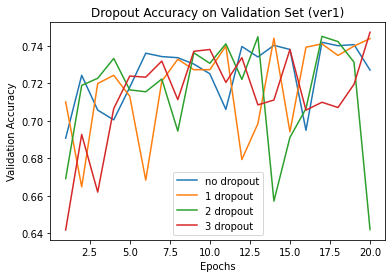

In [248]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_accuracy"]
val_acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_accuracy"]
val_acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Seasonal Model.ver2

In [249]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [250]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [251]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [252]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [253]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 0.5985 - accuracy: 0.6961 - val_loss: 0.5299 - val_accuracy: 0.7703
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8395 - val_loss: 0.3995 - val_accuracy: 0.8700
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.9083 - val_loss: 0.2995 - val_accuracy: 0.9147
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.9585 - val_loss: 0.1867 - val_accuracy: 0.9800
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.1421 - accuracy: 0.9900 - val_loss: 0.1191 - val_accuracy: 0.9932
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9985 - val_loss: 0.0600 - val_accuracy: 0.9986
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9998 - val_loss: 0.0292 - val_accuracy: 0.9996
Epoch 8/20
40/40 [==

**layer 8개**


In [254]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.4258 - accuracy: 0.7934 - val_loss: 0.0556 - val_accuracy: 0.9962
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 2.9354e-04 - accuracy: 1.0000 - val_loss: 7.2244e-05 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 1.3336e-05 - accuracy: 1.0000 - val_loss: 3.8352e-06 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 1.0207e-06 - accuracy: 1.0000 - val_loss: 3.3264e-07 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 1.2608e-07 - accuracy: 1.0000 - val_loss: 6.5967e-08 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 2.3402e-08 - accuracy: 1.0000 - val_loss: 1.4075e

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [255]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 1.8476 - accuracy: 0.7976 - val_loss: 1.0454 - val_accuracy: 0.9990
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.7261 - accuracy: 0.9998 - val_loss: 0.4284 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.4361 - accuracy: 0.9873 - val_loss: 0.2198 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.3656 - accuracy: 0.9561 - val_loss: 0.1470 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1230 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2591 - accuracy: 0.9780 - val_loss: 0.1447 - val_accuracy: 0.9916
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0796 - accuracy: 0.9997 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L1 regularization 2개**

In [256]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 1.9978 - accuracy: 0.7573 - val_loss: 1.2232 - val_accuracy: 0.9549
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.9166 - accuracy: 0.9747 - val_loss: 0.5868 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.4152 - accuracy: 0.9999 - val_loss: 0.2645 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.3465 - accuracy: 0.9862 - val_loss: 0.1728 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2787 - accuracy: 0.9880 - val_loss: 0.1305 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1049 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.2214 - accuracy: 0.9763 - val_loss: 0.0776 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L2 regularization 1개**

In [257]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.5233 - accuracy: 0.7786 - val_loss: 0.2068 - val_accuracy: 0.9545
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1546 - accuracy: 0.9792 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2499 - accuracy: 0.9694 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2144 - accuracy: 0.9882 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L2 regularization 2개**

In [258]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.6165 - accuracy: 0.7869 - val_loss: 0.2141 - val_accuracy: 0.9922
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1110 - accuracy: 0.9990 - val_loss: 0.0752 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2780 - accuracy: 0.9679 - val_loss: 0.0571 - val_accuracy: 0.9998
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9998
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0413 - accuracy: 0.9999 - val_loss: 5.7322 - val_accuracy: 0.4680
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2500 - accuracy: 0.9694 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L1&L2 regularization 1개**

In [259]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 25ms/step - loss: 2.2028 - accuracy: 0.7246 - val_loss: 1.4030 - val_accuracy: 0.9523
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 1.0596 - accuracy: 0.9493 - val_loss: 0.6575 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6645 - accuracy: 0.9878 - val_loss: 0.3603 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.3082 - accuracy: 1.0000 - val_loss: 0.2466 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 19ms/step - loss: 0.3084 - accuracy: 0.9867 - val_loss: 0.1737 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.3256 - accuracy: 0.9621 - val_loss: 0.1376 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1230 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 1.0000
Epoch 8/20
40

### visualize

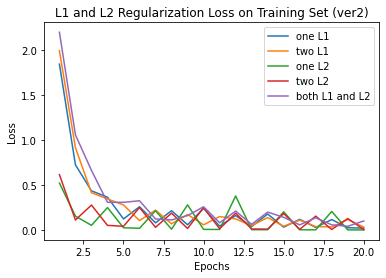

In [260]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

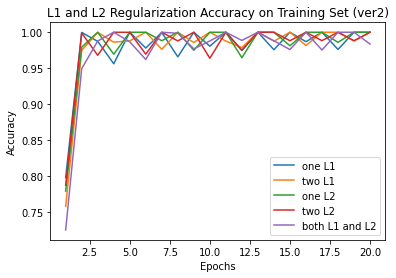

In [261]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

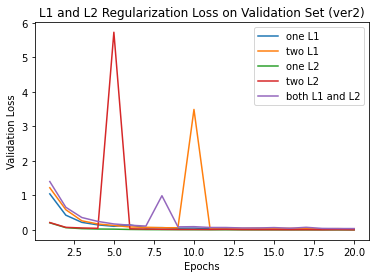

In [262]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

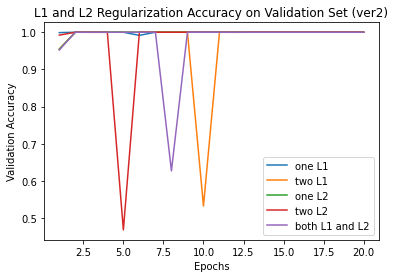

In [263]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [264]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 1.0449 - accuracy: 0.8115 - val_loss: 0.8455 - val_accuracy: 0.8234
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.4312 - accuracy: 0.9815 - val_loss: 0.2556 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.3479 - accuracy: 0.9731 - val_loss: 0.1468 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1321 - accuracy: 1.0000 - val_loss: 0.1139 - val_accuracy: 0.9998
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2521 - accuracy: 0.9753 - val_loss: 0.0767 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0705 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9998
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2107 - accuracy: 0.9748 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 8/20
40

**0.002**

In [265]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.7335 - accuracy: 0.7713 - val_loss: 0.3093 - val_accuracy: 0.9810
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2276 - accuracy: 0.9793 - val_loss: 0.1286 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2617 - accuracy: 0.9882 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0754 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2920 - accuracy: 0.9700 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2231 - accuracy: 0.9659 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 8/20
40

**0.001(original)**

In [266]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.5968 - accuracy: 0.7756 - val_loss: 0.1912 - val_accuracy: 0.9864
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1620 - accuracy: 0.9776 - val_loss: 0.0815 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0652 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1896 - accuracy: 0.9868 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.1723 - accuracy: 0.9860 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 8/20
40

**0.0005**

In [267]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.4856 - accuracy: 0.8124 - val_loss: 0.7229 - val_accuracy: 0.6920
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1465 - accuracy: 0.9746 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2400 - accuracy: 0.9874 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.2937 - accuracy: 0.9659 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 8/20
40

**0.0001**

In [268]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.4974 - accuracy: 0.7488 - val_loss: 0.2993 - val_accuracy: 0.8845
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0368 - accuracy: 0.9952 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.3094 - accuracy: 0.9632 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/20
40

### visualize

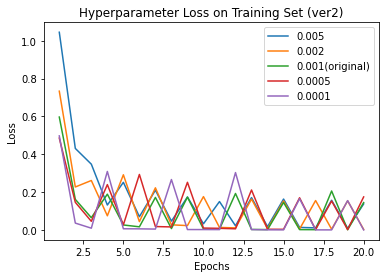

In [269]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

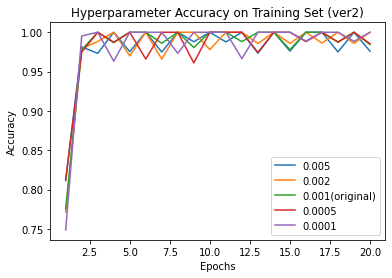

In [270]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

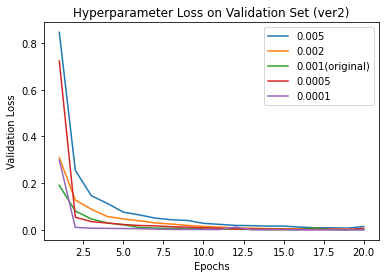

In [271]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

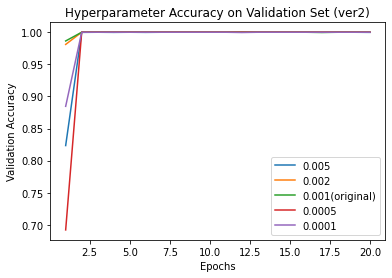

In [272]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.5763 - accuracy: 0.7950 - val_loss: 0.1646 - val_accuracy: 0.9984
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1211 - accuracy: 0.9978 - val_loss: 1.7310 - val_accuracy: 0.5849
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1465 - accuracy: 0.9818 - val_loss: 0.0738 - val_accuracy: 0.9998
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.1704 - accuracy: 0.9768 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1418 - accuracy: 0.9860 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 8/20
40

**# dropout = 2**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


**# dropout = 3**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_threedr = model_seasonal_ver2_threedr.fit(x_train_seasonal_ver2,
                                                                y_train_seasonal_ver2,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


### visualize

In [ ]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history
history_dict_seasonal_ver2_threedr = history_seasonal_ver2_threedr.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]
loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

In [ ]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]
acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]
val_loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

In [ ]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]
val_acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Predict ver1

**h1n1_vaccine**

In [ ]:
test_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver1.csv')

In [ ]:
test_h1n1_ver1.head()

In [ ]:
test_h1n1_ver1 = test_h1n1_ver1.drop(['respondent_id'], axis = 1)
test_h1n1_ver1.head()

In [ ]:
pred_h1n1_ver1 = model_h1n1_ver1.predict(test_h1n1_ver1)

In [ ]:
pred_h1n1_ver1

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1_ver1

**seasonal_vaccine**

In [ ]:
test_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver1.csv')

In [ ]:
test_seasonal_ver1.head()

In [ ]:
test_seasonal_ver1 = test_seasonal_ver1.drop(['respondent_id'], axis = 1)
test_seasonal_ver1.head()

In [ ]:
pred_seasonal_ver1 = model_seasonal_ver1.predict(test_seasonal_ver1)

In [ ]:
pred_seasonal_ver1

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal_ver1

**submission_ver1**

In [ ]:
submission_ver1 = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission_ver1.head()

In [ ]:
submission_ver1.to_csv('submission_ver1.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver21.csv' 파일을 다운받으면 됨.

#### Predict ver2

**h1n1_vaccine**

In [ ]:
test_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_h1n1_ver2.csv')

In [ ]:
test_h1n1_ver2.head()

In [ ]:
test_h1n1_ver2 = test_h1n1_ver2.drop(['respondent_id'], axis = 1)
test_h1n1_ver2.head()

In [ ]:
pred_h1n1_ver2 = model_h1n1_ver2.predict(test_h1n1_ver2)

In [ ]:
pred_h1n1_ver2

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1_ver2

**seasonal_vaccine**

In [ ]:
test_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/test_seasonal_ver2.csv')

In [ ]:
test_seasonal_ver2.head()

In [ ]:
test_seasonal_ver2 = test_seasonal_ver2.drop(['respondent_id'], axis = 1)
test_seasonal_ver2.head()

In [ ]:
pred_seasonal_ver2 = model_seasonal_ver2.predict(test_seasonal_ver2)

In [ ]:
pred_seasonal_ver2

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal_ver2

**submission_ver2**

In [ ]:
submission_ver2 = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission_ver2.head()

In [ ]:
submission_ver2.to_csv('submission_ver2.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission_ver2.csv' 파일을 다운받으면 됨.

# +) Things to consider

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|

# +) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()